In [1]:
import os
cwd = os.getcwd()
# Training and testing folders
train_path = cwd+'/dataset/Training'
valid_path = cwd+'/dataset/Test'

In [2]:
broadleaf_dir = train_path +"/broadleaf"
grass_dir = train_path +"/grass"
soil_dir = train_path +"/soil"
soybean_dir =train_path +"/soybean"

print('total training broadleaf images:', len(os.listdir(broadleaf_dir)))
print('total training grass images:', len(os.listdir(grass_dir)))
print('total training soil images:', len(os.listdir(soil_dir)))
print('total training soybean images:', len(os.listdir(soybean_dir)))

broadleaf_files = os.listdir(broadleaf_dir)
print(broadleaf_files[:10])

grass_files = os.listdir(grass_dir)
print(grass_files[:10])

soil_files = os.listdir(soil_dir)
print(soil_files[:10])

soybean_files = os.listdir(soybean_dir)
print(soybean_files[:10])

total training broadleaf images: 834
total training grass images: 2464
total training soil images: 2274
total training soybean images: 5263
['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg']
['1057.jpg', '1058.jpg', '1059.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg']
['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg']
['2114.jpg', '2115.jpg', '2116.jpg', '2117.jpg', '2118.jpg', '2119.jpg', '2120.jpg', '2121.jpg', '2122.jpg', '2123.jpg']


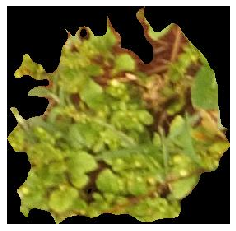

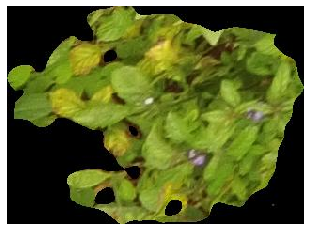

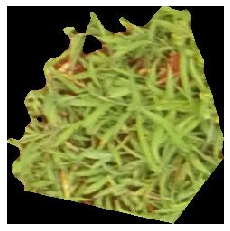

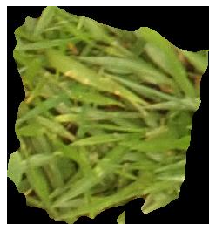

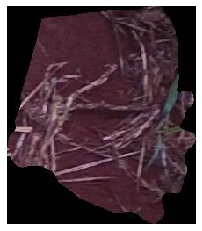

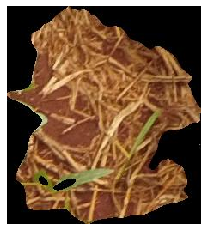

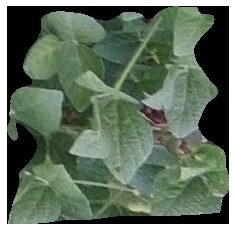

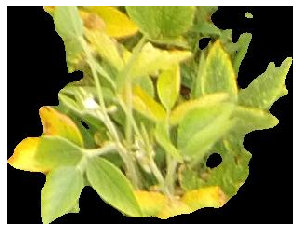

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_broadleaf = [os.path.join(broadleaf_dir, fname) 
                for fname in broadleaf_files[pic_index-2:pic_index]]
next_grass = [os.path.join(grass_dir, fname) 
                for fname in grass_files[pic_index-2:pic_index]]
next_soil = [os.path.join(soil_dir, fname) 
                for fname in soil_files[pic_index-2:pic_index]]
next_soybean = [os.path.join(soybean_dir, fname) 
                for fname in soybean_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_broadleaf+next_grass+next_soil+next_soybean):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_path
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = valid_path
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(200,200),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 10835 images belonging to 4 classes.
Found 4501 images belonging to 4 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
___________________________________________________

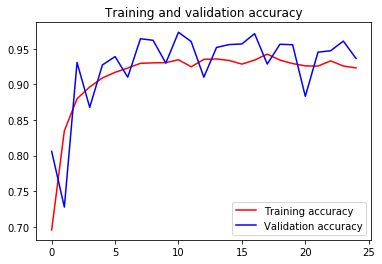

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Found 4501 images belonging to 4 classes.
{'broadleaf': 0, 'grass': 1, 'soil': 2, 'soybean': 3}
Found 4501 images belonging to 4 classes.


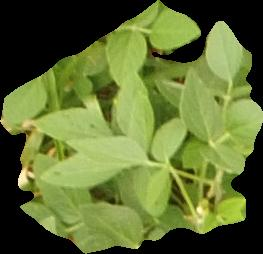

Actual class: soybean\1852.jpg
Predicted class: soybean


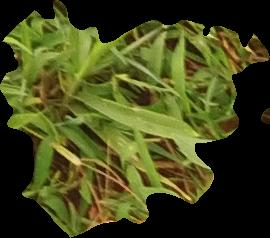

Actual class: grass\346.jpg
Predicted class: grass


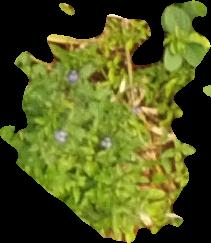

Actual class: broadleaf\135.jpg
Predicted class: broadleaf


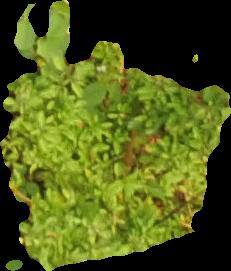

Actual class: broadleaf\125.jpg
Predicted class: broadleaf


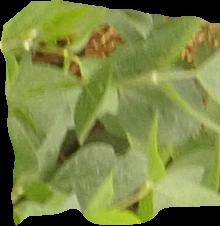

Actual class: soybean\2058.jpg
Predicted class: soybean


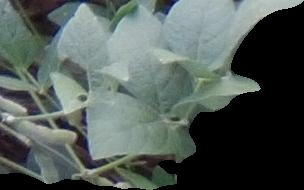

Actual class: soybean\387.jpg
Predicted class: soybean


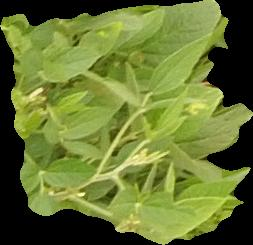

Actual class: soybean\1511.jpg
Predicted class: soybean


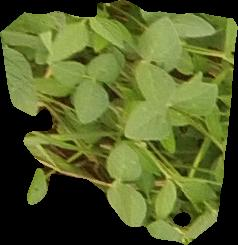

Actual class: soybean\1800.jpg
Predicted class: soybean


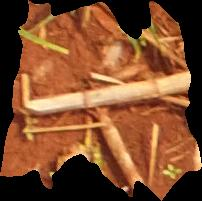

Actual class: soil\520.jpg
Predicted class: soil


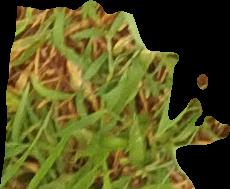

Actual class: grass\358.jpg
Predicted class: grass


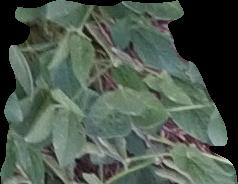

Actual class: soybean\492.jpg
Predicted class: soybean


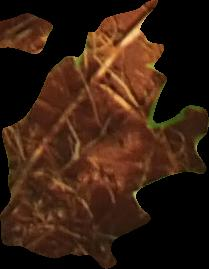

Actual class: soil\917.jpg
Predicted class: soil


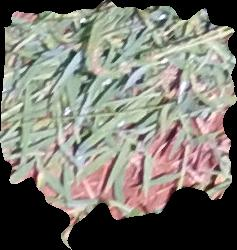

Actual class: grass\436.jpg
Predicted class: broadleaf


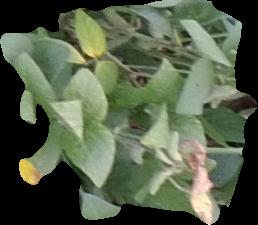

Actual class: soybean\1840.jpg
Predicted class: soybean


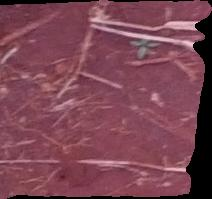

Actual class: soil\782.jpg
Predicted class: soil


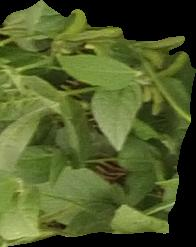

Actual class: soybean\100.jpg
Predicted class: soybean


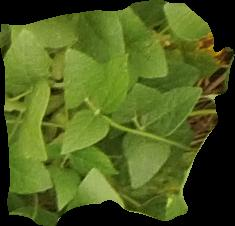

Actual class: soybean\665.jpg
Predicted class: soybean


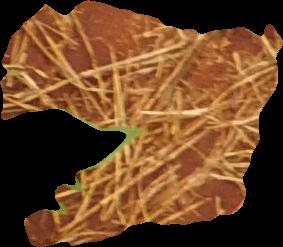

Actual class: soil\44.jpg
Predicted class: soil


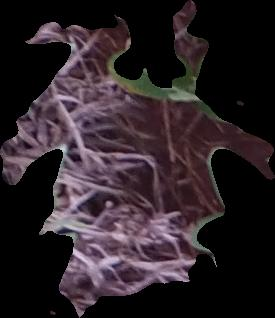

Actual class: soil\955.jpg
Predicted class: soil


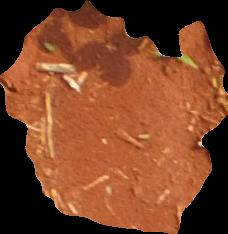

Actual class: soil\866.jpg
Predicted class: soil


In [8]:
import numpy as np
# Resize all the images to this
IMAGE_SIZE = [200, 200]

# Create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255
)

# Get label mapping of class and label number
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False
)


# Visualizing predictions
result = np.round(model.predict_generator(valid_generator))
import random
test_files = []
actual_res = []
test_res = []
for i in range(0, 20):
  rng = random.randint(0, len(valid_generator.filenames))
  test_files.append(valid_path+"/" +  valid_generator.filenames[rng])
  actual_res.append(valid_generator.filenames[rng].split('/')[0])
  test_res.append(labels[np.argmax(result[rng])])
  
from IPython.display import Image, display
for i in range(0, 20):
  display(Image(test_files[i]))
  print("Actual class: " + str(actual_res[i]))
  print("Predicted class: " + str(test_res[i]))
